In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
from math import *
import seaborn as sns
from mpl_toolkits.basemap import Basemap


In [2]:
data = pd.read_csv('NpdbPublicUseDataCsv/NPDB1710.CSV',delimiter=',',low_memory=False)

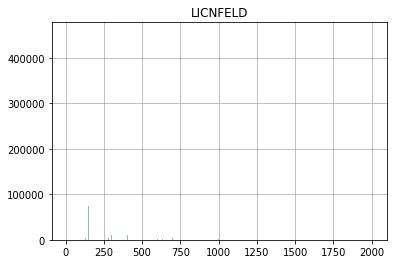

In [3]:
data.hist(column='LICNFELD',alpha=0.5,bins=1999-10,range=(10,1999))
plt.show()

In [4]:
clustering_data = data[data["PTGENDER"].notna() & data["PTTYPE"].notna() & data["PTAGE"].notna() & data["LICNFELD"].notna() & data["PRACTAGE"].notna()][['PTGENDER','PTTYPE','PTAGE','LICNFELD','PRACTAGE']].copy()

In [5]:
clustering_data.replace(to_replace= {'PTGENDER': {"M": 0}}, inplace=True)
clustering_data.replace(to_replace= {'PTGENDER': {"F": 1}}, inplace=True)
clustering_data.replace(to_replace= {'PTGENDER': {"U": 2}}, inplace=True)
clustering_data.replace(to_replace= {'PTTYPE': {"I": 0, "O": 1}}, inplace=True)
clustering_data.replace(to_replace= {'PTTYPE': {"B": 3, "U": 4}}, inplace=True)

In [6]:
clustering_data

,PTGENDER,PTTYPE,PTAGE,LICNFELD,PRACTAGE
404849,0,0,80.0,10,30.0
404850,0,3,20.0,10,50.0
404852,1,1,10.0,651,50.0
404866,0,1,40.0,430,20.0
404869,0,0,10.0,10,60.0
404872,1,0,80.0,10,60.0
404880,1,1,50.0,10,60.0
404881,1,0,20.0,10,50.0
404882,1,0,20.0,10,30.0
404883,1,1,60.0,30,60.0


In [7]:
from sklearn.cluster import DBSCAN
# Compute DBSCAN

db = DBSCAN(eps=0.5, min_samples=1).fit_predict(clustering_data)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
db

array([  0,   1,   2, ...,  26, 489,  16])

In [8]:
clustering_population = []
for i in range(len(np.unique(db))):
    #print(np.where(db==i))
    cur_group = list(clustering_data.iloc[np.where(db==i)[0][0]])
    cur_group.append(len(np.where(db==i)[0]))
    clustering_population.append(cur_group)
    
df_clusters = pd.DataFrame(np.array(clustering_population),columns=["PTGENDER","PTTYPE","PTAGE","LICNFELD","PRACTAGE","POPULATION"])

In [9]:
df_clusters.sort_values('POPULATION',ascending=False)

,PTGENDER,PTTYPE,PTAGE,LICNFELD,PRACTAGE,POPULATION
56,1.0,1.0,40.0,10.0,40.0,1994.0
59,1.0,0.0,40.0,10.0,40.0,1945.0
253,1.0,1.0,40.0,10.0,50.0,1935.0
38,1.0,0.0,30.0,10.0,40.0,1892.0
26,1.0,0.0,40.0,10.0,50.0,1839.0
68,1.0,1.0,50.0,10.0,40.0,1770.0
27,1.0,1.0,50.0,10.0,50.0,1767.0
251,1.0,1.0,30.0,10.0,40.0,1731.0
13,0.0,1.0,50.0,10.0,50.0,1698.0
31,1.0,0.0,50.0,10.0,40.0,1658.0


In [10]:
state_pop = pd.read_excel('nst-est2016-01.xlsx',header=3,skip_footer=5)

new_index_list = {}
for s_label in state_pop.index:
    try:
        if s_label[0]=='.':
            new_index_list.update({s_label: s_label[1:]})
        else:
            new_index_list.update({s_label: s_label})
    except:
        new_index_list.update({s_label: 'unknown'})

print(new_index_list)
state_pop.rename(new_index_list, axis='index',inplace=True)
state_pop

# Questions:

### 1) What is the per capita distribution of malpractice cases for states, counties? This can give us an idea about policy effects.

### 2) What fields, ages, genders are likely to get malpractice cases?

### 3) What demographic is more likely to sue?

### 4) What combinations of practitioner and patient are likely to result in malpractice cases?

In [12]:
data.columns

Index(['SEQNO', 'RECTYPE', 'REPTYPE', 'ORIGYEAR', 'WORKSTAT', 'WORKCTRY',
       'HOMESTAT', 'HOMECTRY', 'LICNSTAT', 'LICNFELD', 'PRACTAGE', 'GRAD',
       'ALGNNATR', 'ALEGATN1', 'ALEGATN2', 'OUTCOME', 'MALYEAR1', 'MALYEAR2',
       'PAYMENT', 'TOTALPMT', 'PAYNUMBR', 'NUMBPRSN', 'PAYTYPE', 'PYRRLTNS',
       'PTAGE', 'PTGENDER', 'PTTYPE', 'AAYEAR', 'AACLASS1', 'AACLASS2',
       'AACLASS3', 'AACLASS4', 'AACLASS5', 'BASISCD1', 'BASISCD2', 'BASISCD3',
       'BASISCD4', 'BASISCD5', 'AALENTYP', 'AALENGTH', 'AAEFYEAR', 'AASIGYR',
       'TYPE', 'PRACTNUM', 'ACCRRPTS', 'NPMALRPT', 'NPLICRPT', 'NPCLPRPT',
       'NPPSMRPT', 'NPDEARPT', 'NPEXCRPT', 'NPGARPT', 'NPCTMRPT', 'FUNDPYMT'],
      dtype='object')

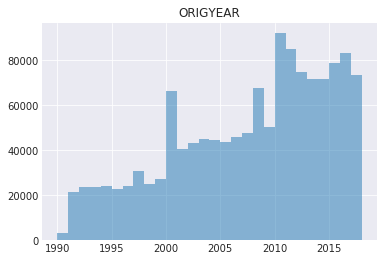

In [13]:
sns.set_style("darkgrid")
data.hist(column='ORIGYEAR',range=(1990,2018),bins=2018-1990,alpha=0.5)
plt.show()

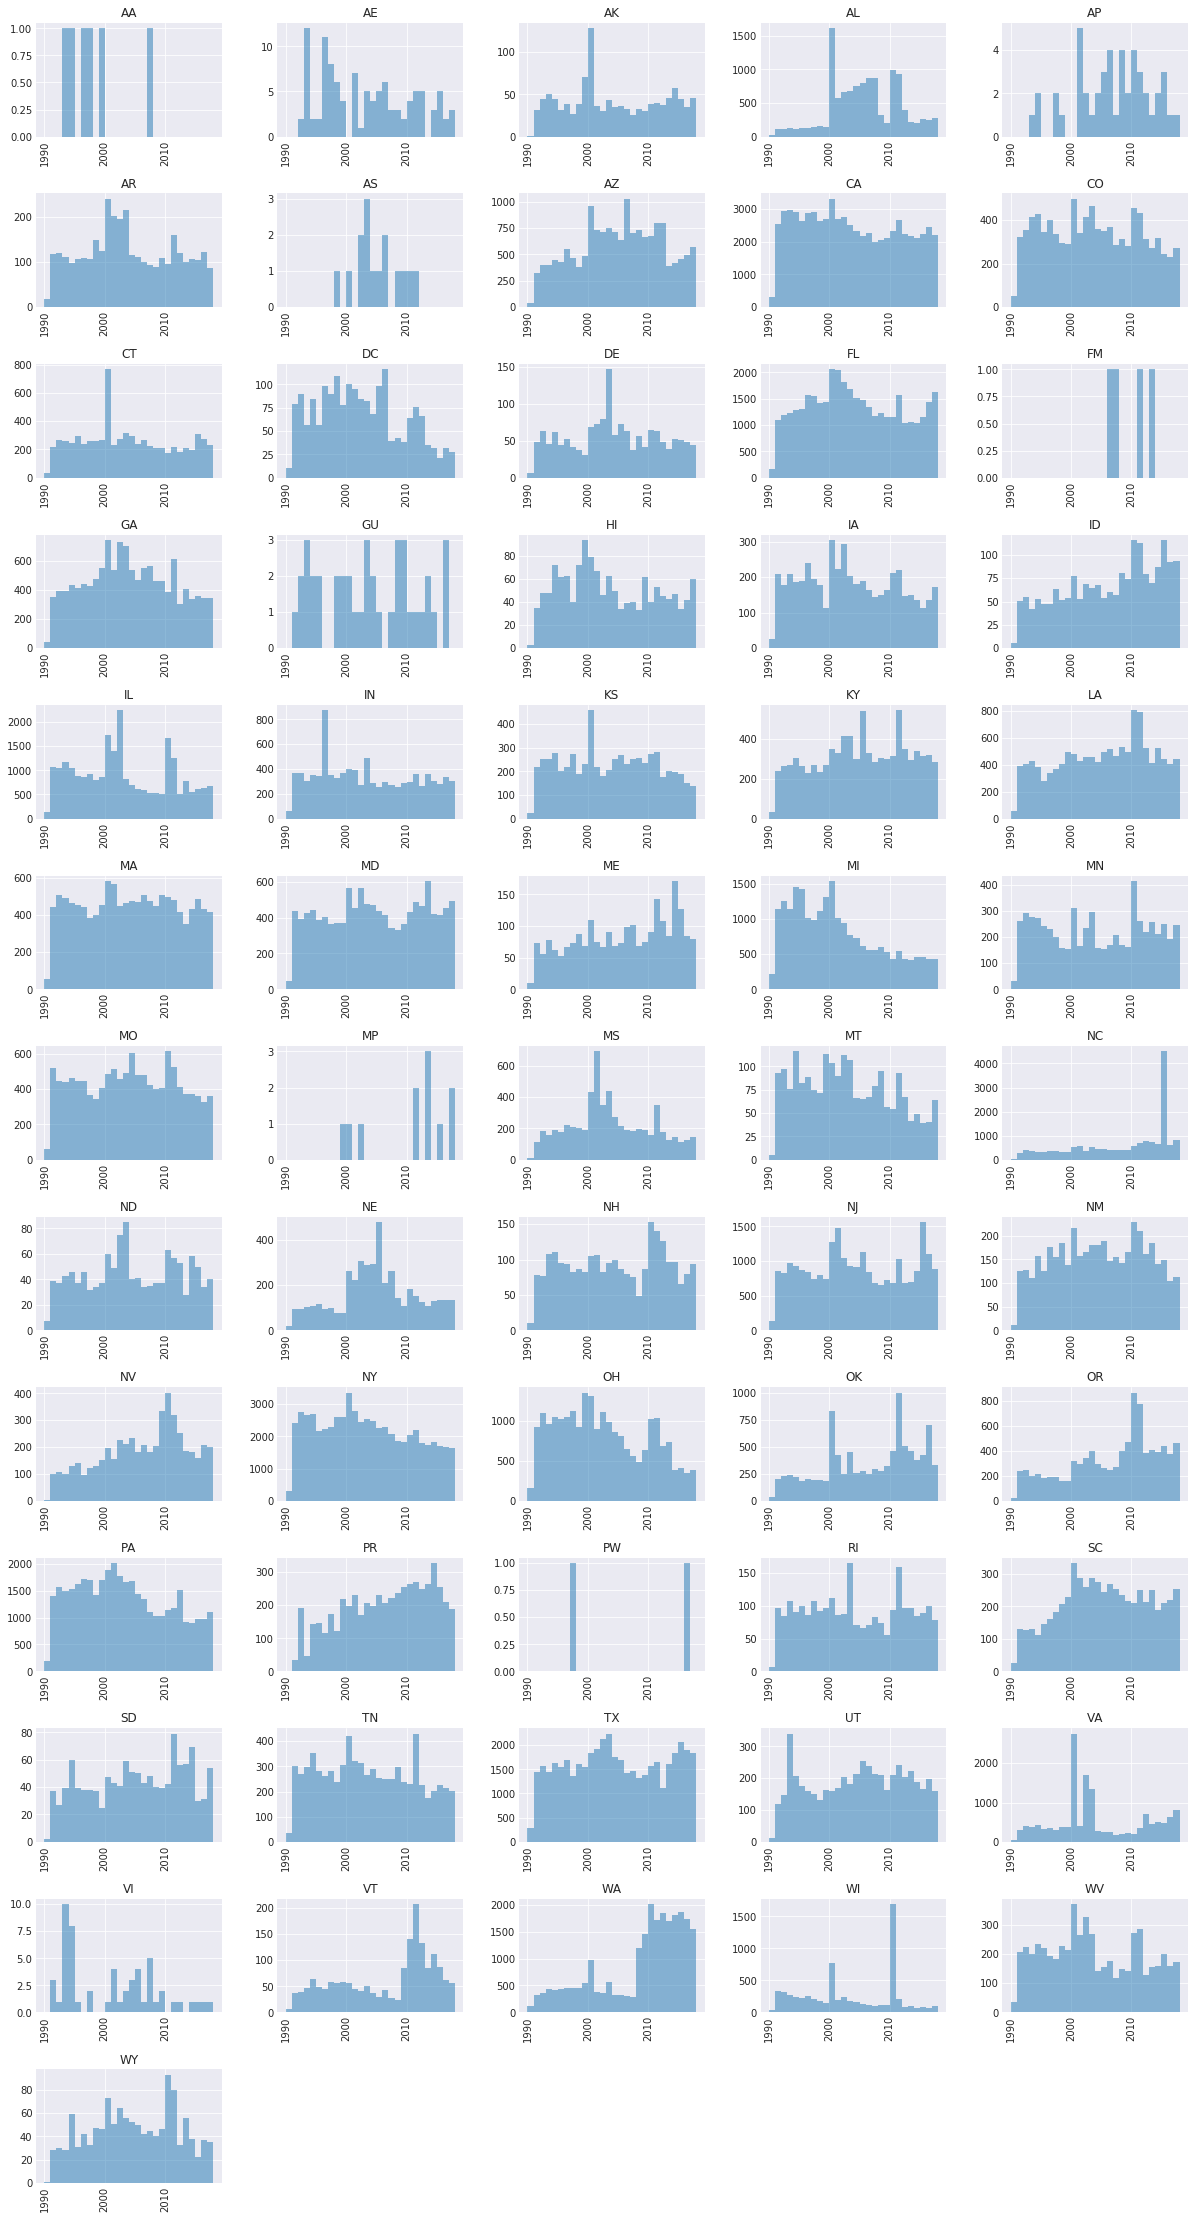

In [14]:
data.hist(column='ORIGYEAR',bins=2018-1990,range=(1990,2018),alpha=0.5,by='WORKSTAT',figsize=(20,40),layout=(13,5))
plt.show()

In [15]:
common_states = np.intersect1d(list(data["WORKSTAT"].unique()),list(state_pop["State Abb"]))

In [16]:
data["PAYMENT"].replace('[\$,]', '', regex=True, inplace=True)

In [17]:
data["PAYMENT"]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
           ...  
1351372      NaN
1351373      NaN
1351374      NaN
1351375      NaN
1351376      NaN
1351377      NaN
1351378      NaN
1351379      NaN
1351380      NaN
1351381      NaN
1351382      NaN
1351383      NaN
1351384      NaN
1351385      NaN
1351386      NaN
1351387      NaN
1351388      NaN
1351389    17500
1351390      NaN
1351391      NaN
1351392      NaN
1351393      NaN
1351394      NaN
1351395      NaN
1351396      NaN
1351397      NaN
1351398      NaN
1351399      N

In [18]:
pd.to_numeric(data[data["WORKSTAT"]=="PA"]['PAYMENT']).mean()

260354.98320791093

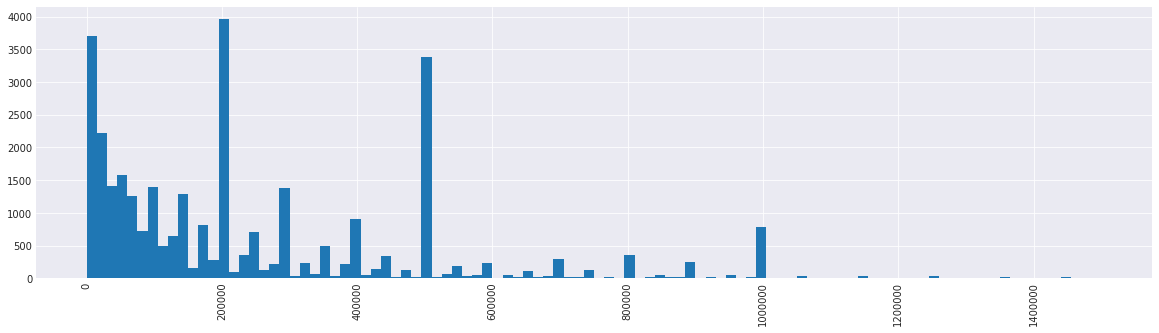

In [19]:
pd.to_numeric(data[(data["WORKSTAT"]=="PA") & (pd.notna(data["PAYMENT"]))]['PAYMENT']).hist(figsize=(20,5),range=(0,1500000),bins=100,xrot=90)
plt.show()

In [20]:
arrays = [["OR","OR"], ['pay_per_case', 'count_per_100']]
column_names = pd.MultiIndex.from_arrays(arrays).T
A=np.array([1,2,3,4])
B=np.array([1,2,3,4])

A_ = pd.DataFrame(np.stack((A,B),axis=0).T,columns=column_names,index=[1,2,3,4])

arrays = [["VT","VT"], ['pay_per_case', 'count_per_100']]
column_names = pd.MultiIndex.from_arrays(arrays).T
B=np.array([1,2,3,4])
B_ = pd.DataFrame(np.stack((B,A),axis=0).T,columns=column_names,index=[1,2,3,4])

arrays = [["VT","VT"], ['pay_per_case', 'count_per_100']]
column_names = pd.MultiIndex.from_arrays(arrays).T
C=np.array([1,2,3,4])
C_ = pd.DataFrame(np.stack((B,A),axis=0).T,columns=column_names,index=[1,2,3,4])

AA = pd.concat([B_,A_],axis=1)
AA = pd.concat([AA,C_],axis=1)
AA["VT"]

,pay_per_case,count_per_100,pay_per_case,count_per_100
1,1,1,1,1
2,2,2,2,2
3,3,3,3,3
4,4,4,4,4


In [21]:
pay_count = None
type(pay_count)

NoneType

In [22]:
pay_count = None
for state in common_states:
    #print(state)
    arrays = [[state,state], ['pay_per_case', 'count_per_10000']]
    column_names = pd.MultiIndex.from_arrays(arrays).T
    mean_payment = [pd.to_numeric(data[(data["WORKSTAT"]==state) & (data["ORIGYEAR"]==i)]['PAYMENT']).mean() for i in range(1990,2018)]
    count_per_capita = [10000*len(data[(data["WORKSTAT"]==state) & (data["ORIGYEAR"]==i)])/state_pop[state_pop["State Abb"]==state][2016][0] for i in range(1990,2018)]
    stack = pd.DataFrame(np.stack((mean_payment,
                                   count_per_capita),axis=0).T,
                         columns=column_names,
                         index=range(1990,2018))
    #print(stack)
    if type(pay_count)==None:
        pay_count = stack
    else:
        pay_count = pd.concat([pay_count, stack], axis=1)

pay_count

AK                             AL                  \
       pay_per_case count_per_10000   pay_per_case count_per_10000   
1990            NaN        0.013479  166966.666667        0.041124   
1991  196140.625000        0.417849  121558.333333        0.236465   
1992  105808.333333        0.593077  217455.555556        0.234409   
1993  130986.764706        0.673951  230903.448276        0.265252   
1994   85071.428571        0.593077  254741.666667        0.244690   
1995  178137.500000        0.431328  281157.894737        0.254971   
1996  151242.857143        0.525682  405196.236559        0.252915   
1997  158375.000000        0.363933  225808.988764        0.285814   
1998  286718.750000        0.525682  296460.674157        0.318714   
1999  270546.296296        0.943531  274947.887324        0.306376   
2000  159310.344828        1.725314  367873.529412        3.304341   
2001  240925.000000        0.485245  244472.727273        1.169987   
2002  210240.384615        0.404370  233686.781609        1.373553   
2003  241908.333333        0.579598  212584.027778        1.377665   
2004  189822.000000        0.471766  211181.818182        1.544219   
2005  737932.692308        0.485245  223898.305085        1.630580   
2006  187931.818182        0.444807  281934.375000        1.790965   
2007  482916.666667        0.336975  182864.912281        1.799190   
2008  193289.473684        0.444807  310454.545455        0.674439   
2009  229140.625000        0.404370  306960.000000        0.421524   
2010  615511.904762        0.512203  282437.500000        2.045936   
2011  419333.333333        0.539161  250020.833333        1.906113   
2012  361029.411765        0.498724  317812.500000        0.820431   
2013  289482.142857        0.620035  454377.659574        0.452368   
2014  270666.666667        0.781783  637780.172414        0.411243   
2015  334264.705882        0.606556  308533.653846        0.532560   
2016  208750.000000        0.471766  426599.000000        0.499661   
2017  251363.636364        0.620035  402366.071429        0.569572   

                 AR                             AZ                  \
       pay_per_case count_per_10000   pay_per_case count_per_10000   
1990   81357.142857        0.060236  166171.250000        0.062039   
1991   83832.258065        0.394880  122601.452282        0.471789   
1992  226307.065217        0.398227  181994.117647        0.581440   
1993  126375.000000        0.371455  111253.600000        0.571340   
1994  116544.871795        0.327951  155957.993197        0.643479   
1995  107418.354430        0.358069  183279.904306        0.610295   
1996  105860.000000        0.364762  134880.930931        0.793528   
1997   96891.791045        0.354723  230950.825083        0.672335   
1998  178015.789474        0.498620  164200.390625        0.542485   
1999  187451.219512        0.414959  182063.586957        0.692534   
2000  225487.654321        0.803146  231539.655172        1.386510   
2001  169092.233010        0.672635  257575.301205        1.047457   
2002  226741.818182        0.655903  254643.769968        1.028701   
2003  326037.974684        0.719485  274889.041096        1.074870   
2004  261940.229885        0.384841  291361.991870        1.021487   
2005  295718.085106        0.374802  273618.580060        0.913279   
2006  213264.492754        0.334644  253462.264151        1.478848   
2007  259293.103448        0.314566  313289.676113        1.009945   
2008  319433.035714        0.294487  327817.073171        1.048900   
2009  330504.098361        0.364762  295964.508929        0.956562   
2010  291380.434783        0.321258  263381.909548        0.973875   
2011  304291.666667        0.532084  311558.849558        1.145566   
2012  252745.833333        0.401573  300744.780220        1.154223   
2013  309718.181818        0.334644  307473.300971        0.561241   
2014  383099.137931        0.358069  301797.794118        0.608853   
2015  318035.000000       

    student_resid   unadj_p  bonf(p)
0        0.114596  0.909613      1.0
1        0.124301  0.901998      1.0
2        0.089517  0.929332      1.0
3        0.065827  0.948001      1.0
4        0.032602  0.974232      1.0
5        0.081141  0.935928      1.0
6       -0.118025  0.906922      1.0
7        0.522026  0.605909      1.0
8        0.773712  0.445823      1.0
9       -0.429959  0.670638      1.0
10       0.075469  0.940398      1.0
11      -0.738105  0.466818      1.0
12       0.497463  0.622890      1.0
13      -0.776081  0.444447      1.0
14      -0.437088  0.665524      1.0
15       0.974208  0.338601      1.0
16       0.661084  0.514160      1.0
17      -1.411696  0.169461      1.0
18      -0.359369  0.722114      1.0
19      -1.728453  0.095329      1.0
20       0.532552  0.598700      1.0
21       2.077589  0.047385      1.0
22      -2.202765  0.036330      1.0
23      -1.709869  0.098760      1.0
24       0.763760  0.451633      1.0
25      -0.043341  0.965748      1.0
2

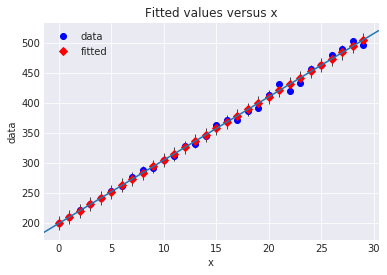

In [484]:
# Imports #
from random import random
import statsmodels.api as smapi
from statsmodels.formula.api import ols
import statsmodels.graphics as smgraphics
# Make data #
x = range(30)
y = [y*(10+random())+200 for y in x]
# Add outlier #
list(x).insert(6,15)
list(y).insert(6,220)
# Make fit #
regression = ols("data ~ x", data=dict(data=y, x=x)).fit()
# Find outliers #
test = regression.outlier_test()
print(test)
outliers = [((x[i],y[i]) for i,t in enumerate(test.iloc[:, 2]) if t < 0.5)]
print( 'Outliers: ', outliers)
# Figure #
figure = smgraphics.regressionplots.plot_fit(regression, 1)
# Add line #
smgraphics.regressionplots.abline_plot(model_results=regression, ax=figure.axes[0])

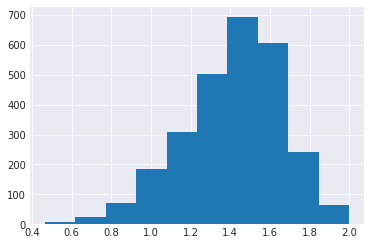

In [23]:
correlation_count = np.zeros((len(common_states),len(common_states)))

for state1 in range(len(common_states)):
    for state2 in range(len(common_states)):
        slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(pay_count[common_states[state1],"count_per_10000"],pay_count[common_states[state2],"count_per_10000"])
        correlation_count[state1,state2] = rvalue


plt.hist((correlation_count+1).flatten())
plt.show()

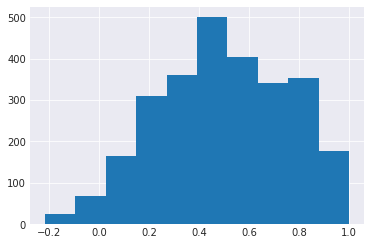

In [24]:
correlation_pay = np.zeros((len(common_states),len(common_states)))

for state1 in range(len(common_states)):
    for state2 in range(len(common_states)):
        slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(pay_count[common_states[state1],"pay_per_case"][1:],pay_count[common_states[state2],"pay_per_case"][1:])
        correlation_pay[state1,state2] = rvalue
      
        
plt.hist((correlation_pay).flatten())
plt.show()

In [25]:
from sklearn.cluster import DBSCAN
# Compute DBSCAN

db = DBSCAN(eps=0.56, min_samples=1,metric='precomputed').fit_predict(1/(correlation_count+1))
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
db

for i in range(len(np.unique(db))):
    #print(np.where(db==i))
    print(common_states[np.where(db==i)])

['AK' 'CT' 'VA']
['AL' 'AZ' 'SC']
['AR' 'CA' 'CO' 'FL' 'GA' 'IA' 'IL' 'KS' 'MA' 'MI' 'MO' 'MS' 'MT' 'NY' 'OH'
 'PA' 'TN' 'WV']
['DC']
['DE' 'ND']
['HI']
['ID' 'LA' 'NV' 'OR' 'WA']
['IN']
['KY']
['MD']
['ME']
['MN']
['NC']
['NE']
['NH']
['NJ']
['NM' 'WY']
['OK']
['PR']
['RI']
['SD']
['TX']
['UT']
['VT']
['WI']


In [26]:
delta_count = []
std_delta_count = []
for state in common_states:
    slope = np.array(pay_count[state]['count_per_10000'][2:])-np.array(pay_count[state]['count_per_10000'][1:-1])
    delta_count.append(np.mean(np.array(slope)))
    std_delta_count.append(np.std(np.array(slope)))
    print(state, np.mean(np.array(slope)), np.std(np.array(slope)))

AK 0.00777635453209 0.31952270193
AL 0.012811813441 0.854154667739
AR -0.00398998909163 0.125429004257
AZ 0.0137063954474 0.253181059742
CA -0.0032043102241 0.0666300175695
CO -0.00347091653091 0.148079371521
CT 0.0010754104476 0.414435170197
DC -0.0287966067434 0.364760951974
DE -0.00201990087134 0.276472709676
FL 0.0101693634904 0.105236973885
GA -0.000261126170174 0.110797937682
HI 0.00673083721223 0.111469492411
IA -0.00453976489269 0.177840347143
ID 0.0095974465308 0.101525604689
IL -0.0118675634955 0.373026362194
IN -0.00347908015765 0.246161551059
KS -0.0104511850678 0.261010346053
KY 0.00407415573698 0.215691749588
LA 0.0042719835204 0.20869163356
MA -0.00169389839842 0.0771717339599
MD 0.00332422108929 0.12629432308
ME 0.00173317965037 0.228338699341
MI -0.0274274238598 0.173796292206
MN -0.00104515959002 0.150421684945
MO -0.00984736582964 0.114266550238
MS 0.00398935095525 0.394180754434
MT -0.0106989277461 0.214986599442
NC 0.0204687737334 1.05823329387
ND 0.000507440292545

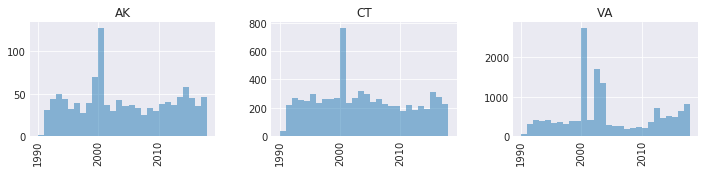

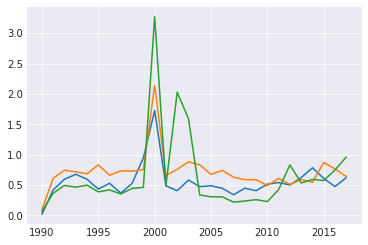

0.0106016158297 0.592131401373


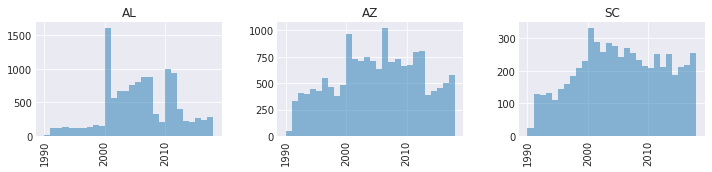

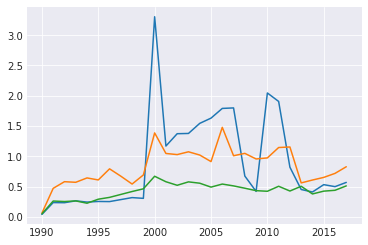

0.0120438082386 0.515892562489


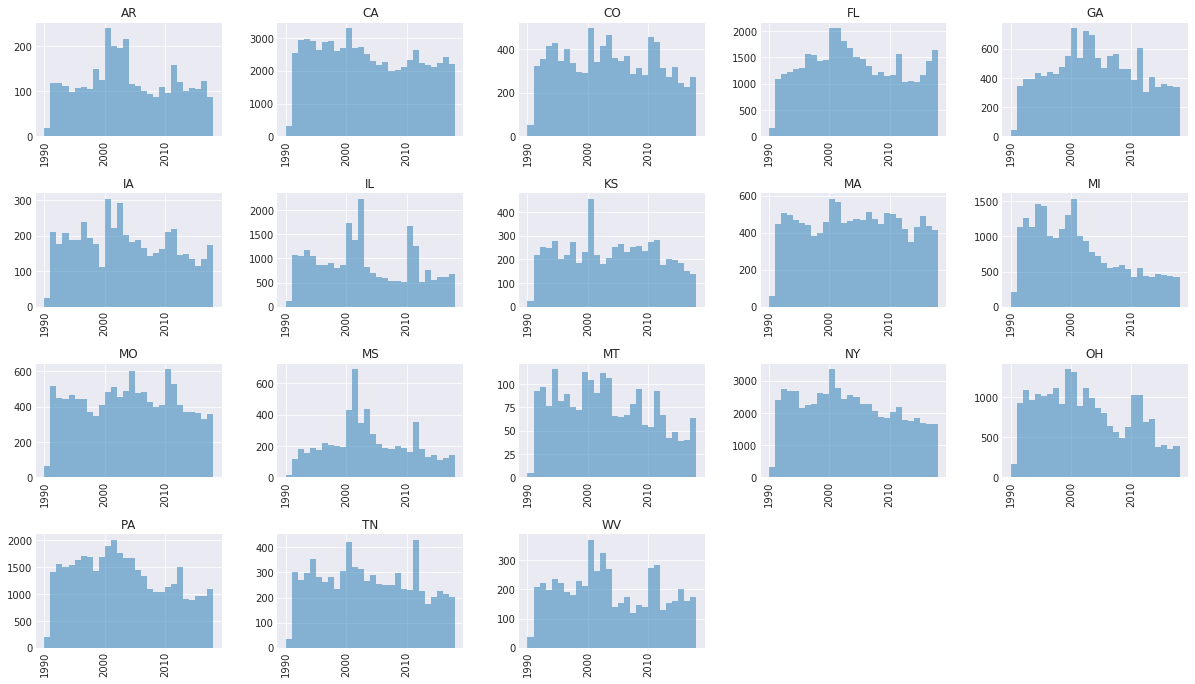

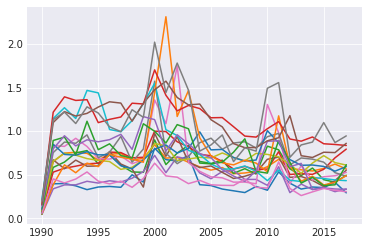

-0.00709161068107 0.206963068233


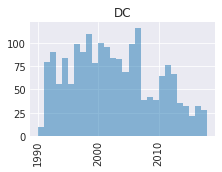

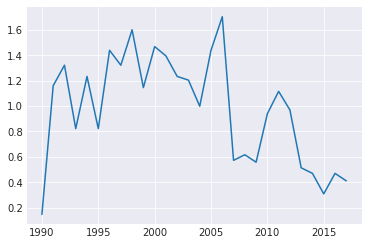

-0.0287966067434 0.364760951974


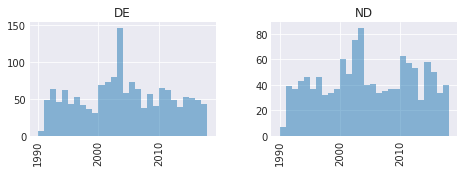

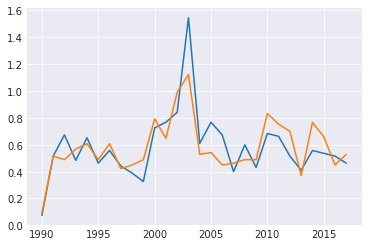

-0.0007562302894 0.245144020326


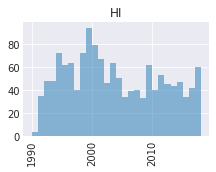

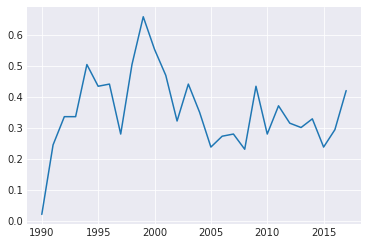

0.00673083721223 0.111469492411


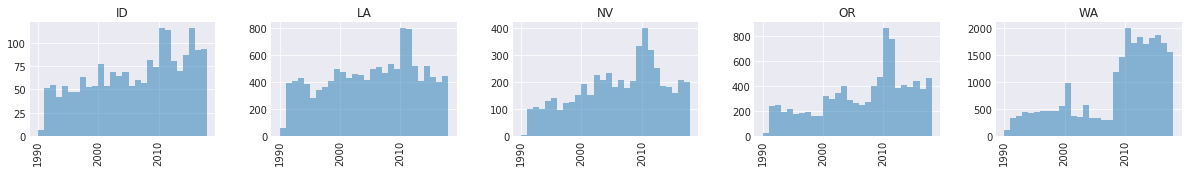

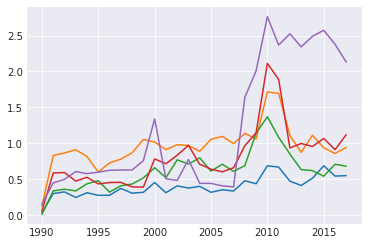

0.0224214843594 0.252412474775


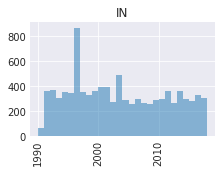

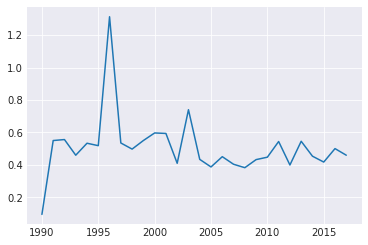

-0.00347908015765 0.246161551059


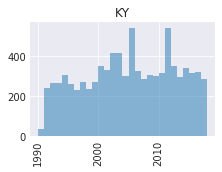

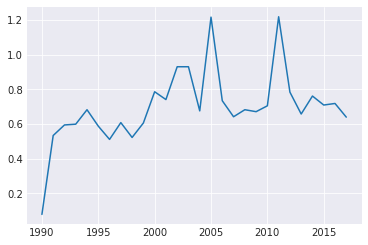

0.00407415573698 0.215691749588


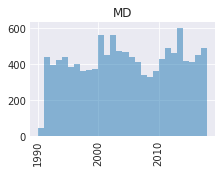

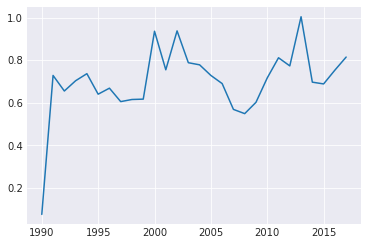

0.00332422108929 0.12629432308


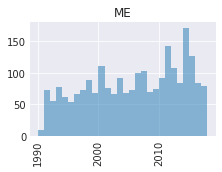

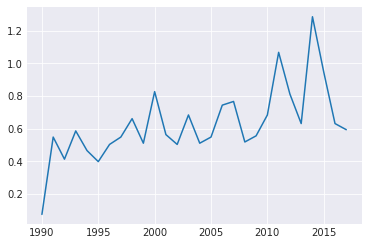

0.00173317965037 0.228338699341


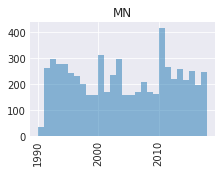

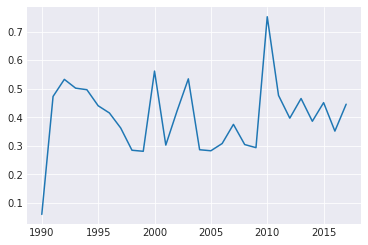

-0.00104515959002 0.150421684945


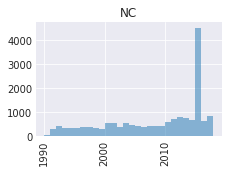

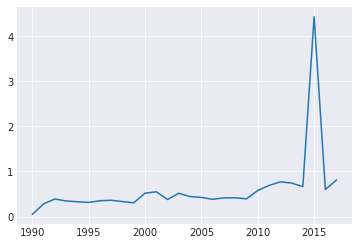

0.0204687737334 1.05823329387


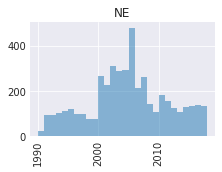

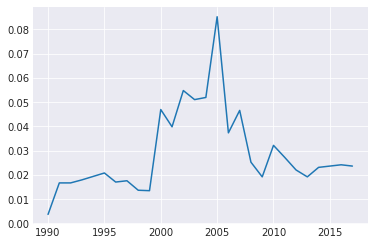

0.000266858757531 0.0147544940647


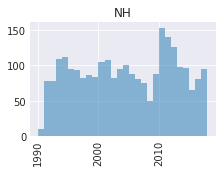

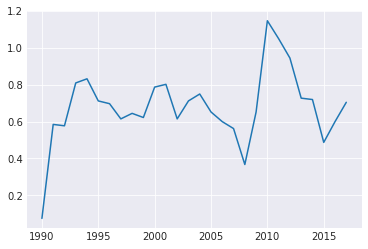

0.00461033054053 0.160829681016


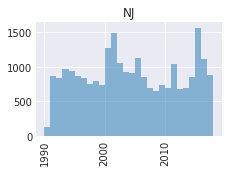

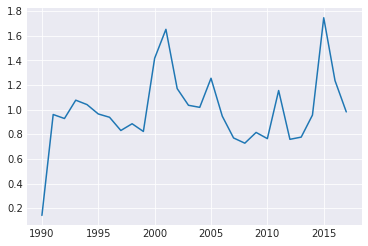

0.000817006834916 0.290124306623


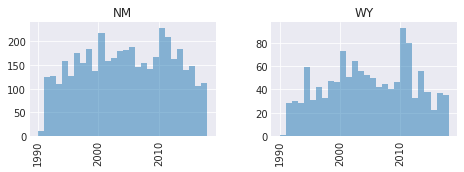

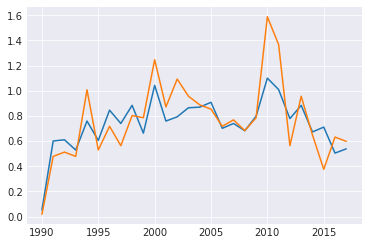

0.00109781182359 0.262840634006


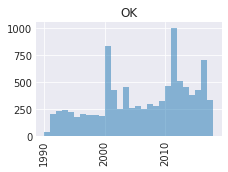

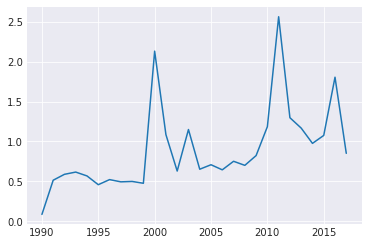

0.0129395798279 0.611993821938


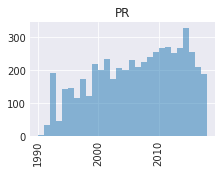

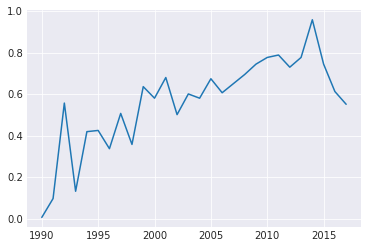

0.0174758192726 0.17382056651


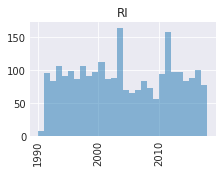

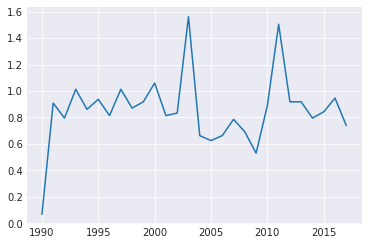

-0.00655330039499 0.313956111805


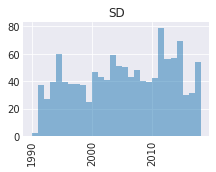

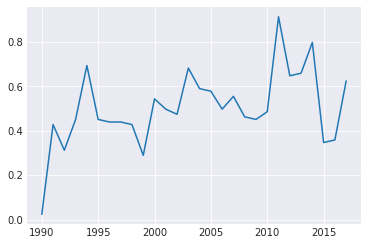

0.00755494981647 0.181225641878


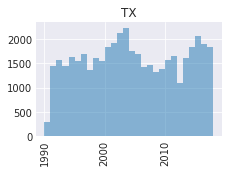

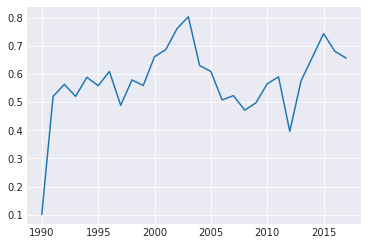

0.00523171748854 0.0854473696973


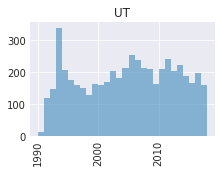

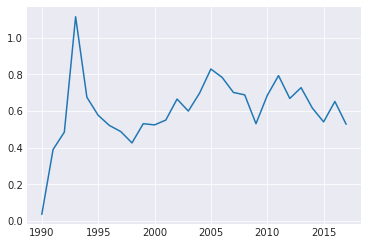

0.00529423051649 0.175967429221


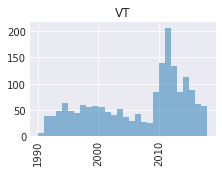

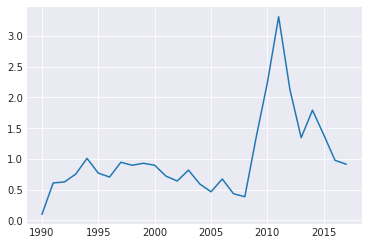

0.0116999079525 0.475392513613


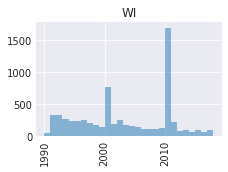

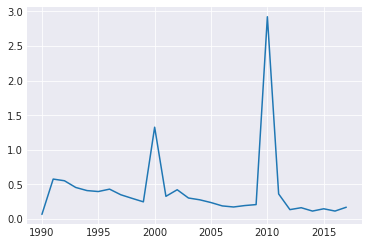

-0.0156409729276 0.788858836402


In [27]:
for i in range(len(np.unique(db))):
    data[data["WORKSTAT"].isin(list(common_states[np.where(db==i)]))].hist(column='ORIGYEAR',bins=2018-1990,range=(1990,2018),alpha=0.5,by='WORKSTAT',figsize=(20,40),layout=(13,5))
    plt.show()
    slope = []
    for state in list(common_states[np.where(db==i)]):
        plt.plot(pay_count.index,pay_count[state]['count_per_10000'])
        #print(np.array(pay_count[state]['count_per_10000'].iloc[1:]))
        #print(pay_count[state]['count_per_10000'][:-1])
        slope.append(np.array(pay_count[state]['count_per_10000'][2:])-np.array(pay_count[state]['count_per_10000'][1:-1]))
    plt.show()
    #print(slope)
    print(np.mean(np.array(slope).flatten()),np.std(np.array(slope).flatten()))
    

In [28]:
print(state_pop[state_pop["State Abb"]=="OH"])
state_pop[state_pop["State Abb"]=="OH"][2016][0]

        Census  Estimates Base      2010      2011      2012      2013  \
Ohio  11536504        11536727  11540983  11544824  11550839  11570022   

          2014      2015      2016 State Abb  
Ohio  11594408  11605090  11614373        OH  


11614373

In [29]:
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper,
    LabelSet,
    Label
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

In [31]:
#from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.us_states import data as states
#from bokeh.sampledata.unemployment import data as unemployment

del states["HI"]
del states["AK"]

palette.reverse()
print(states)
#print(unemployment)

{'NV': {'name': 'Nevada', 'region': 'Southwest', 'lats': [40.68928, 40.4958, 40.30302, 40.09896, 39.99994, 39.75817, 39.61018, 39.45715, 39.36296, 39.23851, 39.08777, 38.90545, 38.75165, 38.55049, 38.20495, 37.95499, 37.77873, 37.70735, 37.47222, 37.13439, 37.0004, 36.99997, 36.817, 36.60322, 36.37619, 36.21464, 36.09833, 36.01461, 36.10119, 36.15058, 36.11546, 36.05493, 35.98542, 35.9167, 35.86436, 35.81412, 35.73579, 35.66942, 35.60517, 35.5417, 35.49125, 35.37012, 35.21811, 35.14231, 35.11791, 35.07971, 35.00332, 35.00186, 35.00195, 35.15341, 35.38796, 35.59033, 35.81231, 36.0018, 36.14577, 36.37205, 36.75057, 37.08441, 37.43715, 37.6185, 37.75309, 37.96065, 38.30368, 38.60904, 38.83427, 38.98156, 39.37557, 39.57782, 39.79567, 40.08934, 40.39719, 40.86934, 41.26742, 41.97905, 41.99454, 41.99484, 41.9972, 41.99746, 41.99621, 41.99594, 41.99572, 41.99428, 41.99384, 41.99375, 41.99259, 41.99478, 41.99586, 41.99629, 41.99699, 41.9975, 41.99767, 41.99804, 41.99817, 41.99842, 41.99819, 41

In [32]:
states = {
    code: state for code, state in states.items()
}
print(states)

{'NV': {'name': 'Nevada', 'region': 'Southwest', 'lats': [40.68928, 40.4958, 40.30302, 40.09896, 39.99994, 39.75817, 39.61018, 39.45715, 39.36296, 39.23851, 39.08777, 38.90545, 38.75165, 38.55049, 38.20495, 37.95499, 37.77873, 37.70735, 37.47222, 37.13439, 37.0004, 36.99997, 36.817, 36.60322, 36.37619, 36.21464, 36.09833, 36.01461, 36.10119, 36.15058, 36.11546, 36.05493, 35.98542, 35.9167, 35.86436, 35.81412, 35.73579, 35.66942, 35.60517, 35.5417, 35.49125, 35.37012, 35.21811, 35.14231, 35.11791, 35.07971, 35.00332, 35.00186, 35.00195, 35.15341, 35.38796, 35.59033, 35.81231, 36.0018, 36.14577, 36.37205, 36.75057, 37.08441, 37.43715, 37.6185, 37.75309, 37.96065, 38.30368, 38.60904, 38.83427, 38.98156, 39.37557, 39.57782, 39.79567, 40.08934, 40.39719, 40.86934, 41.26742, 41.97905, 41.99454, 41.99484, 41.9972, 41.99746, 41.99621, 41.99594, 41.99572, 41.99428, 41.99384, 41.99375, 41.99259, 41.99478, 41.99586, 41.99629, 41.99699, 41.9975, 41.99767, 41.99804, 41.99817, 41.99842, 41.99819, 41

In [33]:
state_xs = [states[code]["lons"] for code in states]
state_ys = [states[code]["lats"] for code in states]

print(state_xs)

[[-114.04392, -114.04558, -114.04619, -114.04644, -114.04658, -114.04727, -114.04757, -114.0473, -114.04779, -114.04841, -114.04885, -114.04833, -114.04916, -114.04992, -114.04997, -114.05013, -114.04939, -114.05198, -114.05264, -114.05187, -114.0506, -114.0506, -114.05014, -114.04736, -114.04338, -114.04404, -114.1139, -114.22646, -114.32346, -114.51122, -114.6729, -114.73513, -114.74365, -114.70883, -114.67489, -114.70415, -114.69704, -114.68702, -114.65449, -114.66076, -114.6768, -114.61121, -114.58031, -114.57354, -114.63064, -114.60899, -114.63423, -114.63349, -114.63361, -114.82052, -115.11622, -115.36992, -115.65233, -115.89512, -116.08072, -116.37528, -116.87227, -117.31883, -117.79563, -118.04392, -118.22972, -118.51722, -119.00097, -119.43506, -119.76041, -119.9748, -120.00608, -120.0015, -120.00049, -119.99733, -119.99567, -119.99926, -120.00002, -119.99919, -119.99917, -119.99917, -119.90622, -119.80128, -119.70479, -119.61469, -119.48157, -119.36302, -119.25103, -119.0022,

In [34]:
state_names = [state['name'] for state in states.values()]

In [35]:
state_rates = []
for name in state_names:
    abbr = state_pop.loc[name]["State Abb"]
    state_rates.append(delta_count[np.where(common_states==abbr)[0][0]])

state_rates

[0.013212716839652092,
 0.013706395447399112,
 -0.015640972927619002,
 -0.00026112617017444759,
 -0.010451185067812448,
 0.0010754104476039016,
 -0.0034790801576473286,
 0.0017331796503679809,
 -0.0016938983984156779,
 -0.010698927746082713,
 0.0033242210892907406,
 -0.0039899890916272459,
 0.012811813441015844,
 0.022953082509363398,
 0.00026685875753053176,
 0.0040741557369781949,
 -0.014687047629437079,
 -0.0034709165309133381,
 0.011699907952513662,
 0.0075549498164680503,
 -0.027427423859844317,
 -0.0098473658296405718,
 0.020468773733353617,
 -0.0065533003949892563,
 0.0095974465307972941,
 -0.0020199008713448377,
 -0.028796606743374802,
 0.0046103305405295631,
 -0.0010451595900165022,
 0.00050744029254541525,
 0.012939579827924375,
 -0.0045397648926925986,
 -0.005666998691108348,
 0.010169363490433351,
 0.0042719835203963719,
 -0.0024026736952881137,
 0.0045982973424600294,
 -0.0091759706948016766,
 0.009613215827378398,
 0.005294230516494294,
 -0.0071415590594751622,
 0.0645423

In [36]:
#state_rates = delta_count[:-3]  #[unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

print(state_names)
print(state_rates)
print(len(state_names),len(state_rates))
#print(county_rates)

['Nevada', 'Arizona', 'Wisconsin', 'Georgia', 'Kansas', 'Connecticut', 'Indiana', 'Maine', 'Massachusetts', 'Montana', 'Maryland', 'Arkansas', 'Alabama', 'Virginia', 'Nebraska', 'Kentucky', 'New York', 'Colorado', 'Vermont', 'South Dakota', 'Michigan', 'Missouri', 'North Carolina', 'Rhode Island', 'Idaho', 'Delaware', 'District of Columbia', 'New Hampshire', 'Minnesota', 'North Dakota', 'Oklahoma', 'Iowa', 'Tennessee', 'Florida', 'Louisiana', 'New Mexico', 'Wyoming', 'Pennsylvania', 'South Carolina', 'Utah', 'West Virginia', 'Washington', 'Mississippi', 'Oregon', 'Illinois', 'New Jersey', 'California', 'Ohio', 'Texas']
[0.013212716839652092, 0.013706395447399112, -0.015640972927619002, -0.00026112617017444759, -0.010451185067812448, 0.0010754104476039016, -0.0034790801576473286, 0.0017331796503679809, -0.0016938983984156779, -0.010698927746082713, 0.0033242210892907406, -0.0039899890916272459, 0.012811813441015844, 0.022953082509363398, 0.00026685875753053176, 0.0040741557369781949, -0

In [37]:
lat_inkm = 111.132 ## at around lat = 45degrees from the wiki latitude page
lon_inkm = 78.847

print((max(max(state_xs))-min(min(state_xs)))*lon_inkm)
print((max(max(state_ys))-min(min(state_ys)))*lat_inkm)
#state_xs

4561.05846665
2656.5126638399997


In [65]:
text_position_x = []
for statex in state_xs:
    text_position_x.append(float("%.5f" % round(np.nanmean(statex),5)))
    
text_position_y = []
for statey in state_ys:
    text_position_y.append(float("%.5f" % round(np.nanmean(statey),5)))
    
print(text_position_x,text_position_y)

[-116.10025, -112.63628, -90.29094, -82.62003, -98.31056, -72.60529, -86.16371, -69.21718, -71.49511, -108.45895, -76.88956, -92.23438, -87.47366, -78.20033, -99.34768, -86.5371, -74.46795, -104.85654, -72.54082, -100.15924, -85.37634, -92.01598, -79.30844, -71.60395, -115.21979, -75.29536, -77.02272, -71.4192, -93.16172, -100.61319, -98.27655, -93.5775, -86.99004, -83.21062, -91.45354, -106.65696, -107.28703, -77.91259, -80.3827, -111.55192, -80.55734, -120.81115, -89.308, -121.85101, -88.89703, -74.66318, -119.73107, -82.44709, -99.73212] [39.48143, 33.70747, 44.14897, 32.45601, 38.55409, 41.64339, 40.06001, 45.43558, 42.06038, 47.4263, 39.03157, 34.59492, 31.49112, 37.60452, 41.2564, 37.26393, 42.24579, 38.84732, 44.36117, 44.36998, 43.75489, 37.86584, 35.16199, 41.36106, 46.0101, 39.06135, 38.89008, 44.39539, 46.81078, 48.08343, 36.12306, 42.19816, 35.81743, 27.68786, 30.42795, 33.61165, 42.70148, 40.79832, 33.27432, 39.72085, 38.9687, 47.78681, 32.01971, 43.90446, 40.27794, 39.779

In [39]:
len(np.where(db==0)[0])
max(db)
len(state_names)
#db_order
for i in db:
    print(i)
    
np.where(common_states=='VA')[0][0]

0
1
2
1
2
2
0
3
4
2
2
5
2
6
2
7
2
8
6
2
9
10
2
11
2
2
2
12
4
13
14
15
16
6
2
2
17
6
2
18
19
1
20
2
21
22
0
23
6
24
2
16


46

In [40]:
from bokeh.palettes import Spectral11

db_order = []
for name in state_names:
    abbr = state_pop.loc[name]["State Abb"]
    #print(np.where(common_states==abbr)[0][0])
    db_order.append(db[np.where(common_states==abbr)[0][0]])
    
    
for i in range(len(db_order)):
    print(db_order[i],state_names[i],db[i],common_states[i])

6 Nevada 0 AK
1 Arizona 1 AL
24 Wisconsin 2 AR
2 Georgia 1 AZ
2 Kansas 2 CA
0 Connecticut 2 CO
7 Indiana 0 CT
10 Maine 3 DC
2 Massachusetts 4 DE
2 Montana 2 FL
9 Maryland 2 GA
2 Arkansas 5 HI
1 Alabama 2 IA
0 Virginia 6 ID
13 Nebraska 2 IL
8 Kentucky 7 IN
2 New York 2 KS
2 Colorado 8 KY
23 Vermont 6 LA
20 South Dakota 2 MA
2 Michigan 9 MD
2 Missouri 10 ME
12 North Carolina 2 MI
19 Rhode Island 11 MN
6 Idaho 2 MO
4 Delaware 2 MS
3 District of Columbia 2 MT
14 New Hampshire 12 NC
11 Minnesota 4 ND
4 North Dakota 13 NE
17 Oklahoma 14 NH
2 Iowa 15 NJ
2 Tennessee 16 NM
2 Florida 6 NV
6 Louisiana 2 NY
16 New Mexico 2 OH
16 Wyoming 17 OK
2 Pennsylvania 6 OR
1 South Carolina 2 PA
22 Utah 18 PR
2 West Virginia 19 RI
6 Washington 1 SC
2 Mississippi 20 SD
6 Oregon 2 TN
2 Illinois 21 TX
15 New Jersey 22 UT
2 California 0 VA
2 Ohio 23 VT
21 Texas 6 WA


In [41]:
db_spectral = []
for i in db_order:
    #print(i,len(np.where(db_order==i)[0]),i%11)
    if len(np.where(db_order==i)[0])==1:
        db_spectral.append(-1)
    if len(np.where(db_order==i)[0])>1:
        db_spectral.append(i)
        
print(db_spectral)
db_spectral_arr = np.array(db_spectral)
print(np.unique(db_spectral_arr[np.where(db_spectral_arr!=-1)[0]]))
ordered = 0
for label in np.unique(db_spectral_arr[np.where(db_spectral_arr!=-1)[0]]):
    print(label)
    db_spectral_arr[np.where(db_spectral_arr==label)[0]]=ordered
    ordered += 1
    
db_spectral_arr

[6, 1, -1, 2, 2, 0, -1, -1, 2, 2, -1, 2, 1, 0, -1, -1, 2, 2, -1, -1, 2, 2, -1, -1, 6, 4, -1, -1, -1, 4, -1, 2, 2, 2, 6, 16, 16, 2, 1, -1, 2, 6, 2, 6, 2, -1, 2, 2, -1]
[ 0  1  2  4  6 16]
0
1
2
4
6
16


array([ 4,  1, -1,  2,  2,  0, -1, -1,  2,  2, -1,  2,  1,  0, -1, -1,  2,
        2, -1, -1,  2,  2, -1, -1,  4,  3, -1, -1, -1,  3, -1,  2,  2,  2,
        4,  5,  5,  2,  1, -1,  2,  4,  2,  4,  2, -1,  2,  2, -1])

In [42]:
state_clusters = []
for i in range(len(db_spectral_arr)):
    if db_spectral_arr[i]==-1:
        state_clusters.append('black')
    else:
        state_clusters.append(Spectral11[db_spectral_arr[i]])
    print(db_spectral_arr[i],state_clusters[-1])

4 #e6f598
1 #3288bd
-1 black
2 #66c2a5
2 #66c2a5
0 #5e4fa2
-1 black
-1 black
2 #66c2a5
2 #66c2a5
-1 black
2 #66c2a5
1 #3288bd
0 #5e4fa2
-1 black
-1 black
2 #66c2a5
2 #66c2a5
-1 black
-1 black
2 #66c2a5
2 #66c2a5
-1 black
-1 black
4 #e6f598
3 #abdda4
-1 black
-1 black
-1 black
3 #abdda4
-1 black
2 #66c2a5
2 #66c2a5
2 #66c2a5
4 #e6f598
5 #ffffbf
5 #ffffbf
2 #66c2a5
1 #3288bd
-1 black
2 #66c2a5
4 #e6f598
2 #66c2a5
4 #e6f598
2 #66c2a5
-1 black
2 #66c2a5
2 #66c2a5
-1 black


In [67]:
print(text_position_x)
print(text_position_y)
print(state_clusters)
print(state_xs)

[-116.10025, -112.63628, -90.29094, -82.62003, -98.31056, -72.60529, -86.16371, -69.21718, -71.49511, -108.45895, -76.88956, -92.23438, -87.47366, -78.20033, -99.34768, -86.5371, -74.46795, -104.85654, -72.54082, -100.15924, -85.37634, -92.01598, -79.30844, -71.60395, -115.21979, -75.29536, -77.02272, -71.4192, -93.16172, -100.61319, -98.27655, -93.5775, -86.99004, -83.21062, -91.45354, -106.65696, -107.28703, -77.91259, -80.3827, -111.55192, -80.55734, -120.81115, -89.308, -121.85101, -88.89703, -74.66318, -119.73107, -82.44709, -99.73212]
[39.48143, 33.70747, 44.14897, 32.45601, 38.55409, 41.64339, 40.06001, 45.43558, 42.06038, 47.4263, 39.03157, 34.59492, 31.49112, 37.60452, 41.2564, 37.26393, 42.24579, 38.84732, 44.36117, 44.36998, 43.75489, 37.86584, 35.16199, 41.36106, 46.0101, 39.06135, 38.89008, 44.39539, 46.81078, 48.08343, 36.12306, 42.19816, 35.81743, 27.68786, 30.42795, 33.61165, 42.70148, 40.79832, 33.27432, 39.72085, 38.9687, 47.78681, 32.01971, 43.90446, 40.27794, 39.779

In [68]:
source = ColumnDataSource(data=dict(
    x=state_xs,
    y=state_ys,
    name=state_names,
    rate=state_rates,
    clusters=state_clusters,
    text_pos_x=text_position_x,
    text_pos_y=text_position_y,
))


TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Change in Malpractice, 1990-2018", 
    plot_width=int((max(max(state_xs))-min(min(state_xs)))*lon_inkm/3), 
    plot_height=int((max(max(state_ys))-min(min(state_ys)))*lat_inkm/3), 
    tools=TOOLS, x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color={'field': 'rate', 'transform': color_mapper}, line_width=0.5)

labels = LabelSet(x='text_pos_x', y='text_pos_y', text='state_names', level='glyph',
              x_offset=0, y_offset=0, source=source, render_mode='canvas')


p.add_layout(labels)


hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Change in Malpractice Cases", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

show(p)

ValueError: Out of range float values are not JSON compliant

In [69]:
source = ColumnDataSource(data=dict(
    x=state_xs,
    y=state_ys,
    name=state_names,
    rate=state_rates,
    clusters=state_clusters,
    text_pos_x=text_position_x,
    text_pos_y=text_position_y,
))


TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Change in Malpractice, 1990-2018", 
    plot_width=int((max(max(state_xs))-min(min(state_xs)))*lon_inkm/3), 
    plot_height=int((max(max(state_ys))-min(min(state_ys)))*lat_inkm/3), 
    tools=TOOLS, x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color={'field': 'rate', 'transform': color_mapper}, line_width=0.5)

labels = LabelSet(x='text_pos_x', y='text_pos_y', text='state_names', level='glyph',
              x_offset=0, y_offset=0, source=source, render_mode='canvas')


p.add_layout(labels)


hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Change in Malpractice Cases", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

show(p)

ValueError: Out of range float values are not JSON compliant

In [70]:
source = ColumnDataSource(data=dict(
    x=state_xs,
    y=state_ys,
    name=state_names,
    rate=state_rates,
    clusters=state_clusters,
))

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(title="Change in Malpractice, 1990-2018", 
    plot_width=int((max(max(state_xs))-min(min(state_xs)))*lon_inkm/3), 
    plot_height=int((max(max(state_ys))-min(min(state_ys)))*lat_inkm/3), tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

show(p)

ValueError: Out of range float values are not JSON compliant

In [597]:
from bokeh.plotting import figure, show, output_file
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.us_states import data as states
from bokeh.sampledata.unemployment import data as unemployment

#del states["HI"]
#del states["AK"]

EXCLUDED = ("ak", "hi", "pr", "gu", "vi", "mp", "as")

state_xs = [states[code]["lons"] for code in states]
state_ys = [states[code]["lats"] for code in states]

county_xs=[counties[code]["lons"] for code in counties if counties[code]["state"] not in EXCLUDED]
county_ys=[counties[code]["lats"] for code in counties if counties[code]["state"] not in EXCLUDED]

colors = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77", "#980043"]

county_colors = []
for county_id in counties:
    if counties[county_id]["state"] in EXCLUDED:
        continue
    try:
        rate = unemployment[county_id]
        idx = int(rate/6)
        county_colors.append(colors[idx])
    except KeyError:
        county_colors.append("black")

p = figure(title="US Unemployment 2009", toolbar_location="left",
           plot_width=1100, plot_height=700)

#p.patches(county_xs, county_ys,
#          fill_color=county_colors, fill_alpha=0.7,
#          line_color="white", line_width=0.5)

p.patches(state_xs, state_ys, 
          fill_color=county_colors, fill_alpha=0.7,
          line_color="#884444", line_width=2, line_alpha=0.3)

output_file("choropleth.html", title="choropleth.py example")

show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: rate [renderer: GlyphRenderer(id='281705bf-79c5-4f66-afb4-a2f7923b5504', ...)]


In [158]:
states = data["WORKSTAT"].unique()
state_labels = []
num_cases = []
num_cases_per_capita = []
for i in states:
    try:
        num = len(data[data["WORKSTAT"]==i])
        num_per_capita = 1000*len(data[data["WORKSTAT"]==i])/state_pop[state_pop["State Abb"]==i][2016][0]
        num_cases.append(num)
        num_cases_per_capita.append(num_per_capita)
        state_labels.append(i)
    except:
        pass
    

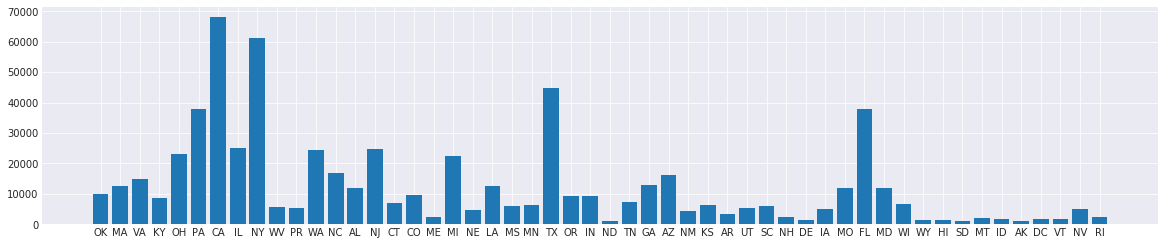

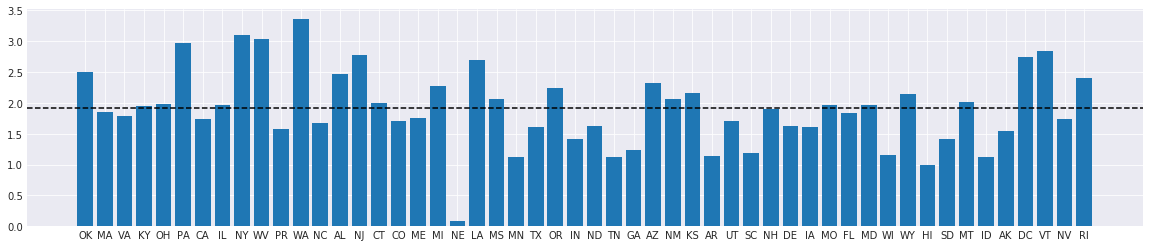

In [159]:
plt.figure(figsize=(20,4))
plt.bar(range(len(num_cases)),num_cases, align='center')
plt.xticks(range(len(num_cases)), state_labels)
plt.show()

#print(state_labels,num_cases_per_capita)
plt.figure(figsize=(20,4))
plt.bar(range(len(num_cases_per_capita)),num_cases_per_capita, align='center')
plt.axhline(y=np.mean(num_cases_per_capita),color='black',linestyle='--')
plt.xticks(range(len(num_cases_per_capita)), state_labels)
plt.show()

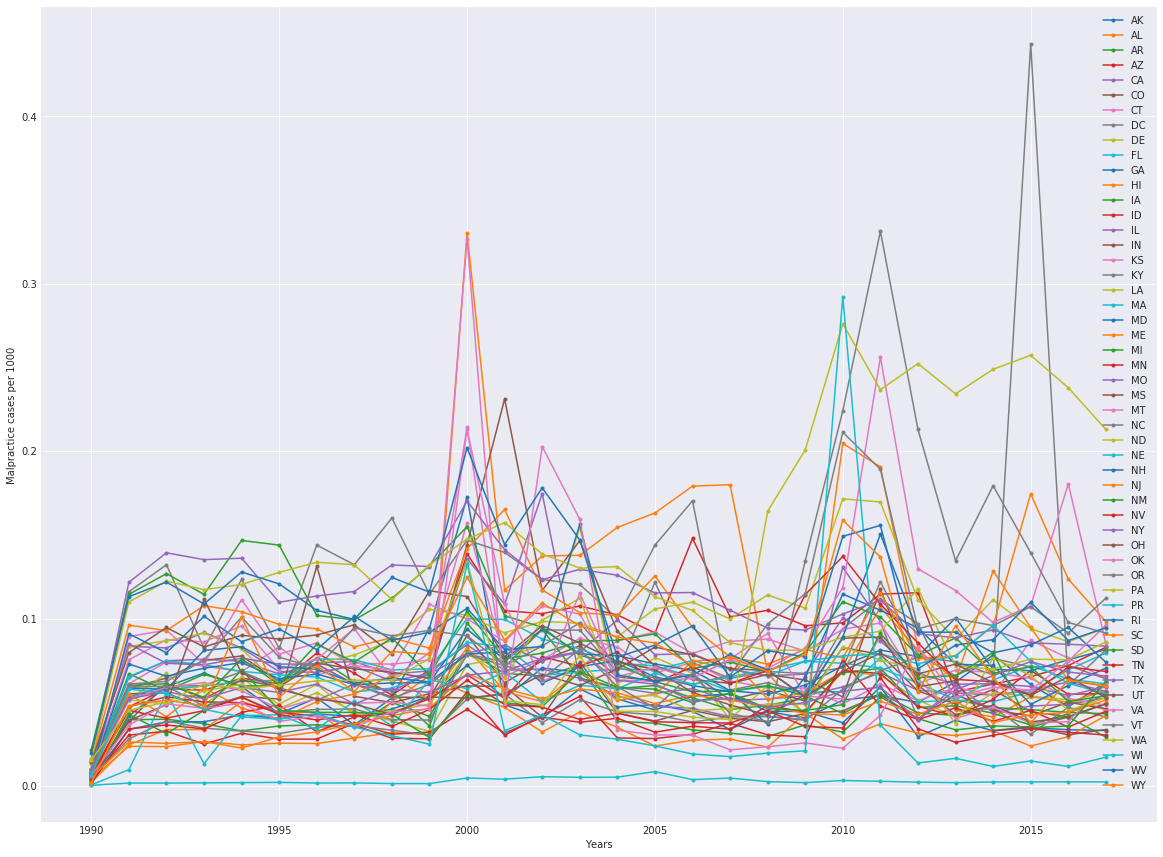

In [161]:
plt.figure(figsize=(20,15))
for i in common_states:
    #print(i)
    curve = [100*len(data[(data["WORKSTAT"]==i) & (data["ORIGYEAR"]==year)])/state_pop[state_pop["State Abb"]==i][2016][0] for year in range(1990,2018)]
    #print(curve)
    plt.plot(range(1990,2018),curve,label=i,marker='.')

plt.legend()
plt.xlabel('Years')
plt.ylabel('Malpractice cases per 100')
plt.show()

In [162]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# output to static HTML file
output_file("lines.html")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

# show the results
show(p)

In [163]:
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.stocks import AAPL, IBM, MSFT, GOOG

p = figure(plot_width=800, plot_height=250, x_axis_type="datetime")
p.title.text = 'Click on legend entries to mute the corresponding lines'

for data, name, color in zip([AAPL, IBM, MSFT, GOOG], ["AAPL", "IBM", "MSFT", "GOOG"], Spectral4):
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'])
    p.line(df['date'], df['close'], line_width=2, color=color, alpha=0.8,
           muted_color=color, muted_alpha=0.2, legend=name)

p.legend.location = "top_left"
p.legend.click_policy="mute"

output_file("interactive_legend.html", title="interactive_legend.py example")

show(p)

In [196]:
from bokeh.palettes import Category20
from bokeh.plotting import figure, output_file, show
from bokeh.models import Legend, HoverTool

#from bokeh.sampledata.stocks import AAPL, IBM, MSFT, GOOG
hover = HoverTool(names=list(common_states))
#hover = HoverTool(tooltips=[
#    ("State:", "$index"),
#    ("(x,y)", "($x, $y)"),
#    ("desc", "@desc"),
#])


p = figure(plot_width=1500, plot_height=1500, tools=[hover])
p.title.text = 'Click on legend entries to mute the corresponding lines.'

#for data, name, color in zip([AAPL, IBM, MSFT, GOOG], ["AAPL", "IBM", "MSFT", "GOOG"], Spectral4):
#    df = pd.DataFrame(data)
#    df['date'] = pd.to_datetime(df['date'])
#    p.line(df['date'], df['close'], line_width=2, color=color, alpha=0.8,
#           muted_color=color, muted_alpha=0.2, legend=name)

for state, color in zip(common_states, Category20[20]+Category20[20]+Category20[20]):
    print(state)
    curve = pd.DataFrame([100*len(data[(data["WORKSTAT"]==state) & (data["ORIGYEAR"]==year)])/state_pop[state_pop["State Abb"]==state][2016][0] for year in range(1990,2018)], index=range(1990,2018),columns=[state])
    #print(curve)
    plt.plot(range(1990,2018),curve,label=i,marker='.')
    p.line(curve.index, curve[state],line_width=2, color=color, alpha=1.,
           muted_color=color, muted_alpha=0.2, legend=state)


p.legend.location = "top_left"
p.legend.click_policy="mute"

#output_file("interactive_legend.html", title="interactive_legend.py example")

show(p)

AK
AL
AR
AZ
CA
CO
CT
DC
DE
FL
GA
HI
IA
ID
IL
IN
KS
KY
LA
MA
MD
ME
MI
MN
MO
MS
MT
NC
ND
NE
NH
NJ
NM
NV
NY
OH
OK
OR
PA
PR
RI
SC
SD
TN
TX
UT
VA
VT
WA
WI
WV
WY


In [179]:
from bokeh.palettes import Category20
print(Category20[20])
Category20[20]+Category20[20]+Category20[20]

['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']


['#1f77b4',
 '#aec7e8',
 '#ff7f0e',
 '#ffbb78',
 '#2ca02c',
 '#98df8a',
 '#d62728',
 '#ff9896',
 '#9467bd',
 '#c5b0d5',
 '#8c564b',
 '#c49c94',
 '#e377c2',
 '#f7b6d2',
 '#7f7f7f',
 '#c7c7c7',
 '#bcbd22',
 '#dbdb8d',
 '#17becf',
 '#9edae5',
 '#1f77b4',
 '#aec7e8',
 '#ff7f0e',
 '#ffbb78',
 '#2ca02c',
 '#98df8a',
 '#d62728',
 '#ff9896',
 '#9467bd',
 '#c5b0d5',
 '#8c564b',
 '#c49c94',
 '#e377c2',
 '#f7b6d2',
 '#7f7f7f',
 '#c7c7c7',
 '#bcbd22',
 '#dbdb8d',
 '#17becf',
 '#9edae5',
 '#1f77b4',
 '#aec7e8',
 '#ff7f0e',
 '#ffbb78',
 '#2ca02c',
 '#98df8a',
 '#d62728',
 '#ff9896',
 '#9467bd',
 '#c5b0d5',
 '#8c564b',
 '#c49c94',
 '#e377c2',
 '#f7b6d2',
 '#7f7f7f',
 '#c7c7c7',
 '#bcbd22',
 '#dbdb8d',
 '#17becf',
 '#9edae5']